<a href="https://colab.research.google.com/github/MarvelousGrace/Pytorch-Tutorials/blob/main/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Computer Vision
https://www.apple.com/careers/us/students.html
https://www.youtube.com/live/ODSJsviD_SU?si=YRCMtCy5HpS50n1O
https://www.learnpytorch.io/03_pytorch_computer_vision/

https://pytorch.org/vision/stable/index.html

## 0.Computer vision in pytorch
*['torchvision'](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch computer vision
* 'torchvision.datasets' - get datasets and data loading functions for computer vision here
* 'torchvision.mohttps://pytorch.org/vision/stable/index.htmlhttps://pytorch.org/vision/stable/index.htmlhttps://pytorch.org/vision/stable/index.htmlhttps://pytorch.org/vision/stable/index.htmldels' -get pretrained computer vision models that you can leverage for your own problems
* 'torchvision.transforms' - functions for manipulationg visio data (images) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - Base dataset class for PyTorch.
* 'torch.utils.data.DataLoader -Create a Pytorch iterable over a dataset'

In [ ]:
#Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for vizualization
import matplotlib.pyplot as plt

# Checkversions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Getting a dataset
The dataset we'll be using is Fashion MNIST from torchvision.dataset - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [ ]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True,# do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12056472.69it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202219.41it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3713961.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7979407.61it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height,width]")
print(f"Imagelabel:{class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height,width]
Imagelabel:Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


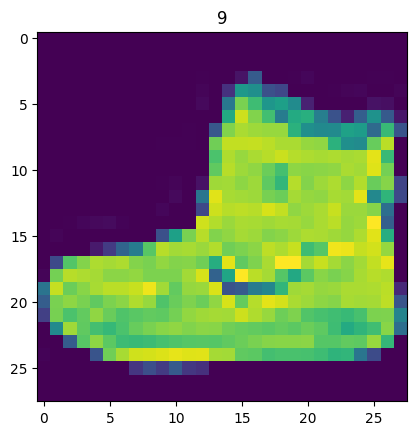

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
#image

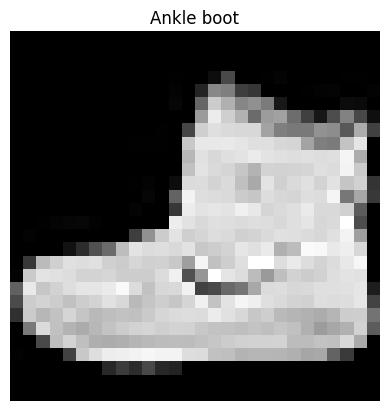

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

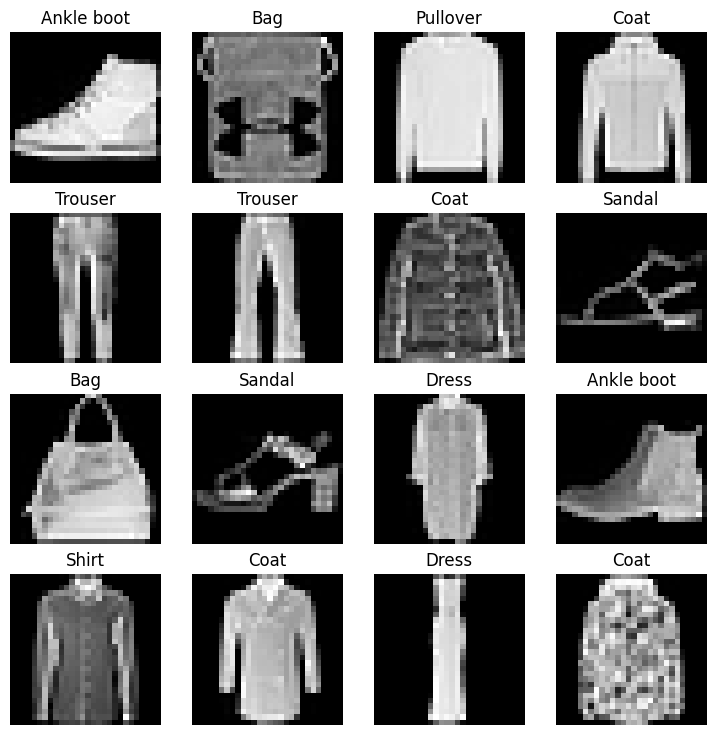

In [ ]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

Doyouthinkthis items of clothing (images could be modelled with pure linear lines? Or do you think we'll need non-linearity)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.
DataLoader turn our data into a PyTorch iterable.
More specifically, we want to turn our data into batches (or mini-batches).
Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

For more in mini-batches, see here: https://youtu.be/4qJaSmvhxi8?si=i41PFMlgIEaJii6S

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7ce21d62f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7ce47e2e90>)

In [ ]:
# Let's check out what we've created
print(f"DataLoaders:{train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f7ce21d62f0>, <torch.utils.data.dataloader.DataLoader object at 0x7f7ce47e2e90>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
10000/32

312.5

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label:6, label size: torch.Size([])


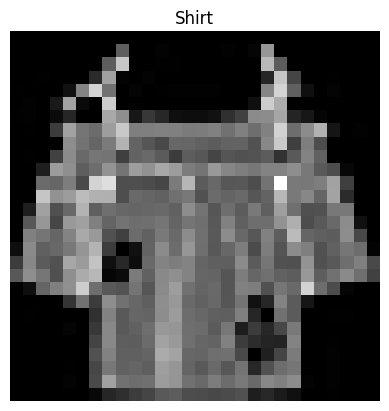

In [ ]:
# Show asample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label:{label}, label size: {label.shape}")

### 3. Model 0 :Build a basline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.
A baseline model is a simple model you will try and improve upon with subsequent models/experiments.
In other words: start simply and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}) -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape}) -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28])) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784])) -> [color_channels, height*width]


In [ ]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
             input_shape: int,
             hidden__units: int,
             output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape,
                out_features=hidden_units),
      nn.Linear(in_features=hidden__units,
                out_features=output_shape)
  )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setuo model input parameters
model_0 = FashionMNISTModelV0 (
    input_shape=28*28, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
    ).to("cpu")

model_0

TypeError: FashionMNISTModelV0.__init__() got an unexpected keyword argument 'hidden_units'

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()#torch.eq()calculateswheretwotensorsare equal
  acc = (correct /len(y_pred)) * 100
  return acc

In [ ]:
import requests
frompathlibimportPath

In [2]:
# Set up your GitHub username and email
!git config --global user.name "MarvelousGrace"
!git config --global user.email "marvelous@stu.gdou.edu.cn"


In [6]:
!git clone https://github.com/MarvelousGrace/Pytorch-Tutorials.git


Cloning into 'Pytorch-Tutorials'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [7]:
cd Pytorch-Tutorials/


/content/Pytorch-Tutorials


In [12]:
!cp -r /content/Pytorch-Tutorials/* .


cp: '/content/Pytorch-Tutorials/README.md' and './README.md' are the same file
